Exploring correlations between page hits over the year for the ChrisCo company's website.

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# 1.Read the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv('https://tinyurl.com/ChrisCoDV/Pages/DailyHits.csv', index_col=0)
data.index = pd.to_datetime(data.index)

1. Creating a scatter plot of the two high volume pages against each other.

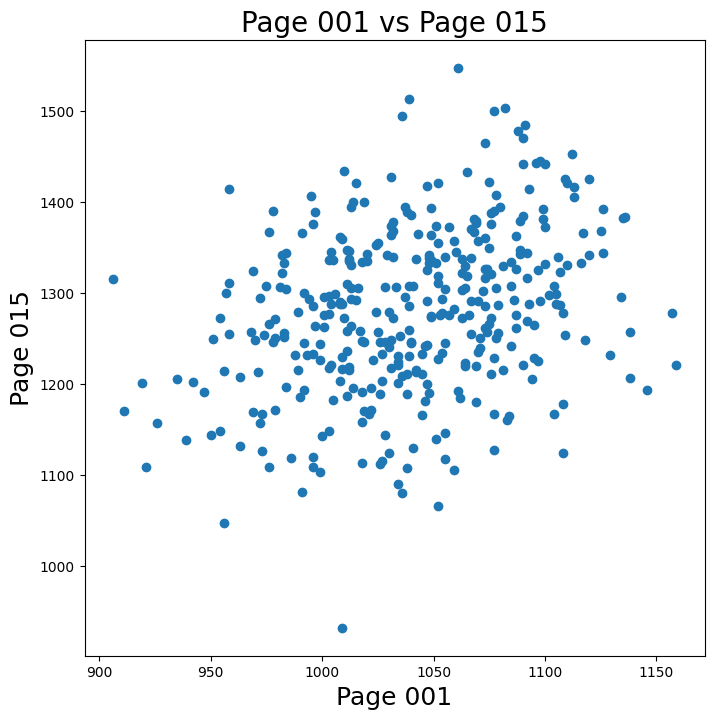

In [2]:
selected = ['001', '015']

for i, name_i in enumerate(selected):
  for j in range(i + 1, len(selected)):
    name_j = selected[j]
    plt.figure(figsize=(8, 8))
    plt.scatter(data[name_i], data[name_j])
    plt.title('Page ' + name_i + ' vs Page ' + name_j, fontsize=20)
    plt.xlabel('Page ' + name_i, fontsize=18)
    plt.ylabel('Page ' + name_j, fontsize=18)
    plt.show()

2. Creating a single visualisation showing scatter subplots for all pairs of medium volume pages against each
other.

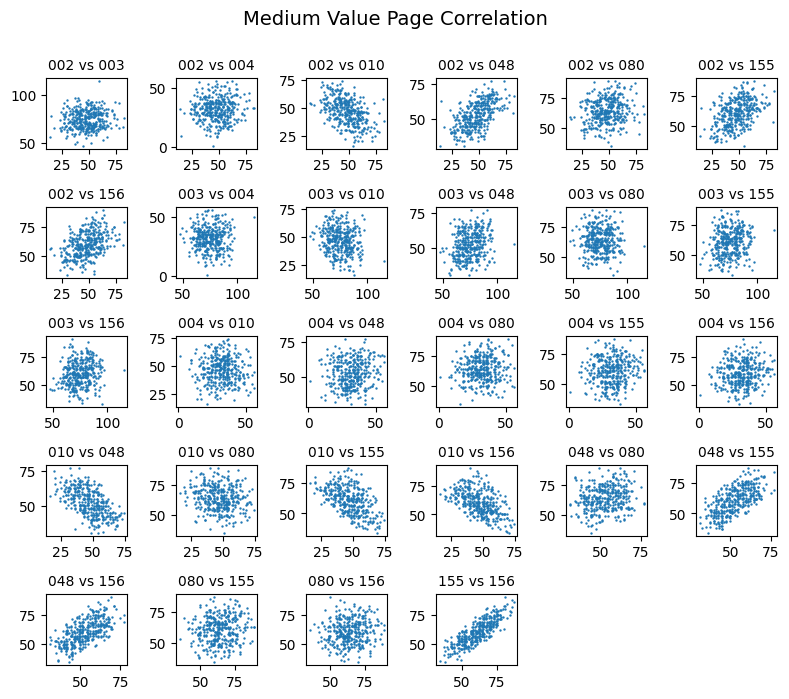

In [3]:
selected = ['002', '003', '004', '010', '048', '080', '155', '156']

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Medium Value Page Correlation', fontsize=14, position=(0.5, 1.0))
for i, name_i in enumerate(selected):
  for j in range(i + 1, len(selected)):
    name_j = selected[j]
    sub = fig.add_subplot(6, 6, counter)
    sub.set_title(name_i + ' vs ' + name_j,fontsize=10)
    sub.scatter(data[name_i], data[name_j], s=0.5)
    counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()

155 vs 156 pages are most strongly correlated with each other. 002 vs 010, 002 vs 048, 010 vs 048, 048 vs 155, 048 vs 156 pages seem to have some correlation

3. Creating a heatmap showing the correlations between all the high and medium
volume pages.

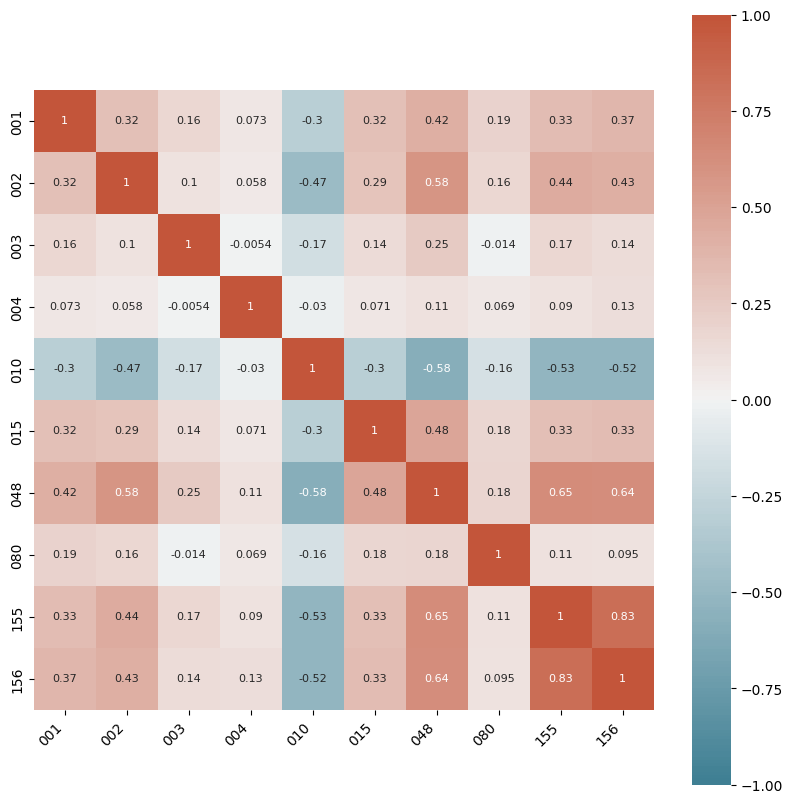

In [4]:
selected = data.columns[data.sum() > 10000]

plt.figure(figsize=(10, 10))
corr = data[selected].corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200), square=True, annot=True, annot_kws={"size": 8})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

4. After seeing the heatmap, the company has decided it is interested in all positive correlations where the
Pearson coefficient is greater than 0.5. Create a visualization showing
scatter subplots for all such pairs of pages.

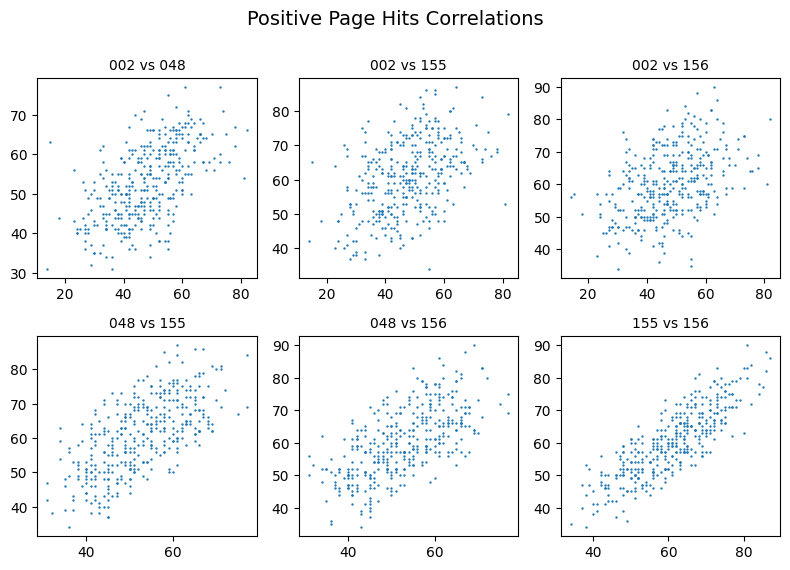

In [6]:
selected = ['002', '048', '155', '156']

counter = 1
fig = plt.figure(figsize=(8, 8))
fig.suptitle('Positive Page Hits Correlations', fontsize=14, position=(0.5, 1.0))
for i, name_i in enumerate(selected):
  for j in range(i + 1, len(selected)):
    name_j = selected[j]
    sub = fig.add_subplot(3, 3, counter)
    sub.set_title(name_i + ' vs ' + name_j,fontsize=10)
    sub.scatter(data[name_i], data[name_j], s=0.5)
    counter += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.tight_layout()
plt.show()


5. Now draw line plots with trendlines for the positively correlated pages selected above.

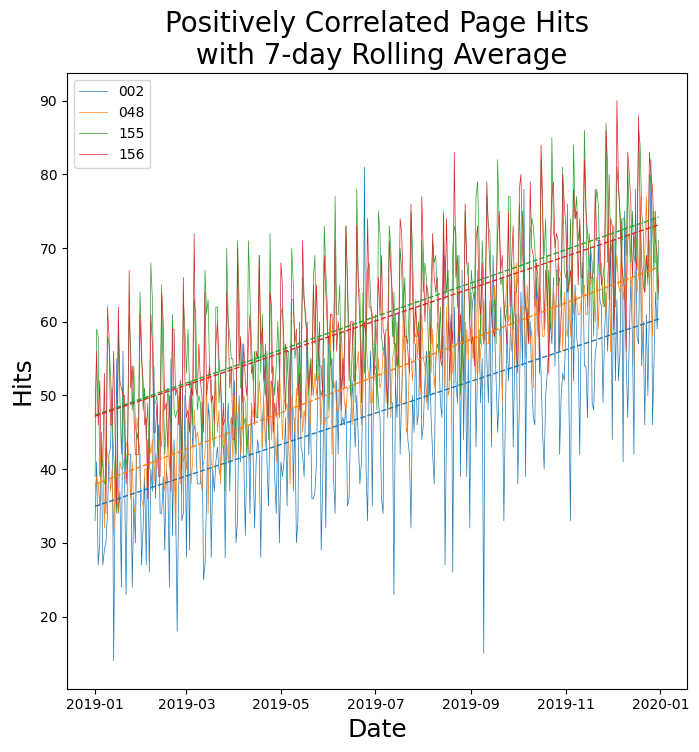

In [7]:
selected = ['002', '048', '155', '156']

period = 7
rolling_average = data.rolling(window=period).mean()

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in selected:
  x = np.arange(len(data[name]))
  z = np.polyfit(x, data[name], 1)
  trend = np.poly1d(z)
  plt.plot(data.index, trend(x), linestyle='--', linewidth=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Hits', fontsize=18)
plt.title('Positively Correlated Page Hits\n with 7-day Rolling Average', fontsize=20)
plt.legend(data[selected], loc=2)
plt.show()

6. The company is also interested in all inverse correlations where the Pearson coefficient is less than –0.55.
Identify the corresponding pages and create a visualisation showing scatter subplots for all such pairs of
pages.

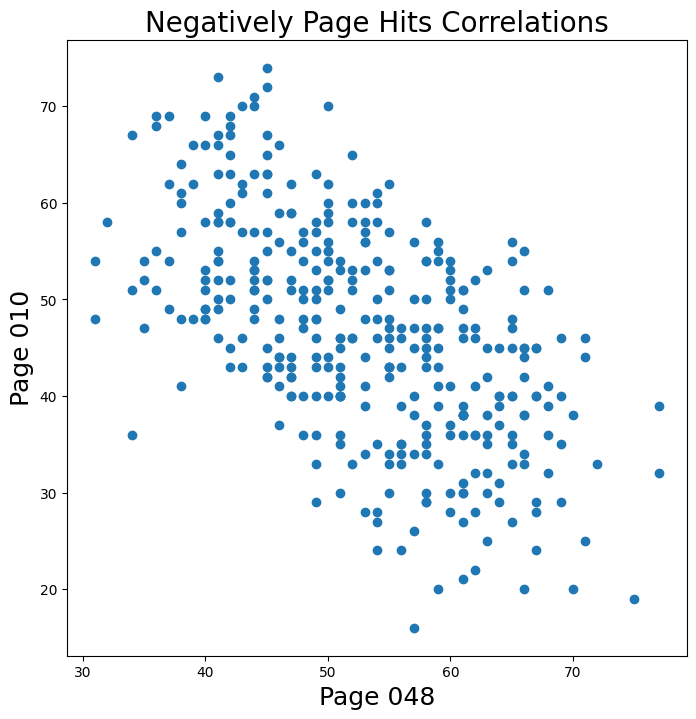

In [8]:
selected = ['048', '010']

for i, name_i in enumerate(selected):
  for j in range(i + 1, len(selected)):
    name_j = selected[j]
    plt.figure(figsize=(8, 8))
    plt.scatter(data[name_i], data[name_j])
    plt.title('Negatively Page Hits Correlations', fontsize=20)
    plt.xlabel('Page ' + name_i, fontsize=18)
    plt.ylabel('Page ' + name_j, fontsize=18)
    plt.show()

7. Now draw line plots with trendlines for the inversely correlated pages selected above.

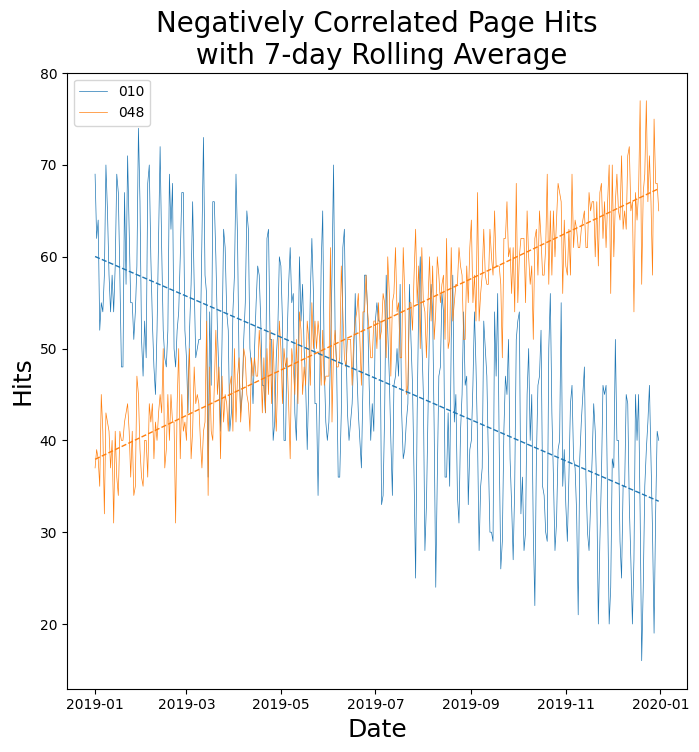

In [9]:
selected = ['010', '048']

period = 7
rolling_average = data.rolling(window=period).mean()

plt.figure(figsize=(8, 8))
plt.plot(data[selected], linewidth=0.5)
plt.gca().set_prop_cycle(None)
for name in selected:
  x = np.arange(len(data[name]))
  z = np.polyfit(x, data[name], 1)
  trend = np.poly1d(z)
  plt.plot(data.index, trend(x), linestyle='--', linewidth=1)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Hits', fontsize=18)
plt.title('Negatively Correlated Page Hits\n with 7-day Rolling Average', fontsize=20)
plt.legend(data[selected], loc=2)
plt.show()